In [ ]:

import pandas as pd
import numpy as np
df=pd.read_csv('amazon_reviews_1.csv')
df.head()

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_date,review,review_category
0,35311,UK,4652511,R2PF9XCB2AOY7C,B00MNYTWMI,174964168,Midnight Castle – A Free Hidden Object Mystery...,Mobile_Apps,5,0,1,N,Y,2014-09-16,"Addictive game Very good game, the graphics ar...",1
1,44590,UK,8778070,R2OVRHVTCC7U18,B00I8Q77Y0,370420344,Flappy Wings (not Flappy Bird),Mobile_Apps,2,1,2,N,Y,2014-02-16,Where to start? I came on here because I wante...,0
2,90295,UK,8476187,RRPSNSVU2RNE4,B008PEHK6U,173475712,Man of Steel [DVD],Video DVD,3,1,5,N,N,2013-12-28,Really Disappointed in this Film I have to say...,0
3,38798,UK,4329864,R1WK44Y81XH276,B00NWLIW0E,13526192,Goat Simulator,Mobile_Apps,1,3,5,N,N,2014-12-26,"Rubbish game When I tried to open it, it said ...",0
4,43364,UK,8080547,R2UL591NPU40SN,B00HRC40T6,887316735,Shadow Blade,Mobile_Apps,1,0,0,N,Y,2015-06-29,One Star Come on,0


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         10000 non-null  int64 
 1   marketplace        10000 non-null  object
 2   customer_id        10000 non-null  int64 
 3   review_id          10000 non-null  object
 4   product_id         10000 non-null  object
 5   product_parent     10000 non-null  int64 
 6   product_title      10000 non-null  object
 7   product_category   10000 non-null  object
 8   star_rating        10000 non-null  int64 
 9   helpful_votes      10000 non-null  int64 
 10  total_votes        10000 non-null  int64 
 11  vine               10000 non-null  object
 12  verified_purchase  10000 non-null  object
 13  review_date        10000 non-null  object
 14  review             9999 non-null   object
 15  review_category    10000 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 1.2+

In [ ]:
# Determine how many missing values exist in the collection, in which case you can use .sum() chained onto is.na()
null_values=df.isna().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot*100
round(null_values,3).sort_values('percent',ascending=False)

,null,percent
review,1,0.01
Unnamed: 0,0,0.00
marketplace,0,0.00
customer_id,0,0.00
review_id,0,0.00
product_id,0,0.00
product_parent,0,0.00
product_title,0,0.00
product_category,0,0.00
star_rating,0,0.00


We have small number of missing values. We can drop them completely.

In [ ]:

df= df.dropna()
df.shape

(9999, 16)

## Basic Feature Extraction - 1
Normally, I tried to make data cleaning first. Then, I realized that while making data cleaning, I am losing some of characters that can help data cleaning. Therefore, there will be two part of feature extraction. Here, I will extract features that can't be exracted after data cleaning.

## 1) Number of stopwords

In [ ]:
import wordcloud
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df['stopwords'] = df['review'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['review','stopwords']].head()

,review,stopwords
0,"Addictive game Very good game, the graphics ar...",4
1,Where to start? I came on here because I wante...,19
2,Really Disappointed in this Film I have to say...,153
3,"Rubbish game When I tried to open it, it said ...",6
4,One Star Come on,1


In [ ]:
#punctuaton
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count

df['punctuation'] = df['review'].apply(lambda x: count_punct(x))
df[['review','punctuation']].head()

,review,punctuation
0,"Addictive game Very good game, the graphics ar...",3
1,Where to start? I came on here because I wante...,16
2,Really Disappointed in this Film I have to say...,65
3,"Rubbish game When I tried to open it, it said ...",2
4,One Star Come on,0



## 2) Number of hashtag characters
One more interesting feature which we can extract from a review is calculating the number of hashtags or mentions present in it. This also helps in extracting extra information from our text data.

In [ ]:
df['hastags'] = df['review'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['review','hastags']].head()

,review,hastags
0,"Addictive game Very good game, the graphics ar...",0
1,Where to start? I came on here because I wante...,0
2,Really Disappointed in this Film I have to say...,0
3,"Rubbish game When I tried to open it, it said ...",0
4,One Star Come on,0


In [ ]:
df.hastags.loc[df.hastags != 0].count()

13


## 3) Number of numerics
Calculate the number of numerics which are present in the tweets can be useful. At least, it doesn't hurt to have such a data!

In [ ]:
df['numerics'] = df['review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['review','numerics']].head()

,review,numerics
0,"Addictive game Very good game, the graphics ar...",0
1,Where to start? I came on here because I wante...,0
2,Really Disappointed in this Film I have to say...,2
3,"Rubbish game When I tried to open it, it said ...",0
4,One Star Come on,0



## 4) Number of Uppercase words
Anger or rage is quite often expressed by writing in UPPERCASE words which makes this a necessary operation to identify those words.

In [ ]:
df['upper'] = df['review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['review','upper']].head()

,review,upper
0,"Addictive game Very good game, the graphics ar...",1
1,Where to start? I came on here because I wante...,6
2,Really Disappointed in this Film I have to say...,13
3,"Rubbish game When I tried to open it, it said ...",1
4,One Star Come on,0


## Number of Words

In [ ]:
df['word_count'] = df['review'].apply(lambda x: len(str(x).split(" ")))
df[['review','word_count']].head()

,review,word_count
0,"Addictive game Very good game, the graphics ar...",18
1,Where to start? I came on here because I wante...,49
2,Really Disappointed in this Film I have to say...,383
3,"Rubbish game When I tried to open it, it said ...",17
4,One Star Come on,4


### Number of characters

In [ ]:
df['char_count'] = df['review'].str.len() ## this also includes spaces
df[['review','char_count']].head()

,review,char_count
0,"Addictive game Very good game, the graphics ar...",104
1,Where to start? I came on here because I wante...,271
2,Really Disappointed in this Film I have to say...,2119
3,"Rubbish game When I tried to open it, it said ...",87
4,One Star Come on,16


3) Average Word Length

In [ ]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/(len(words)+0.000001))

In [ ]:
df['avg_word'] = df['review'].apply(lambda x: avg_word(x)).round(1)
df[['review','avg_word']].head()

,review,avg_word
0,"Addictive game Very good game, the graphics ar...",4.8
1,Where to start? I came on here because I wante...,4.6
2,Really Disappointed in this Film I have to say...,4.5
3,"Rubbish game When I tried to open it, it said ...",4.2
4,One Star Come on,3.2


### Distribution of 'punctuation'

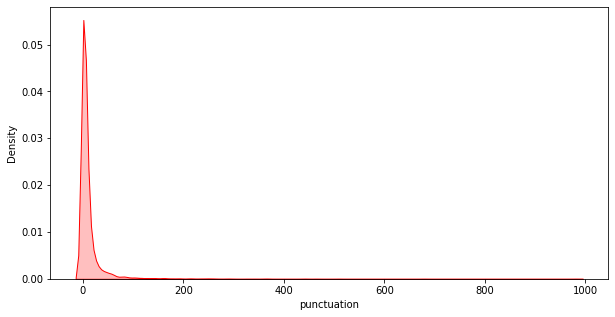

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

plt.figure(figsize=(10,5))
sns.kdeplot(df.punctuation,shade=True, color = 'red')

## Distribution of 'hastags' values

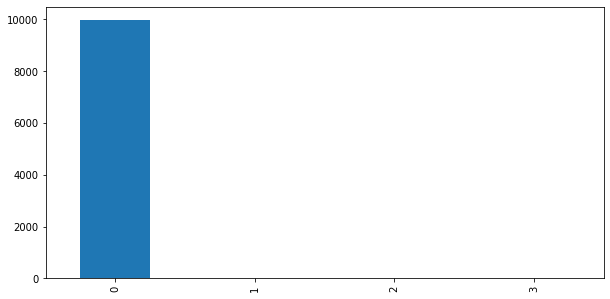

In [ ]:
plt.figure(figsize=(10,5))
df.hastags.value_counts().plot(kind= 'bar')

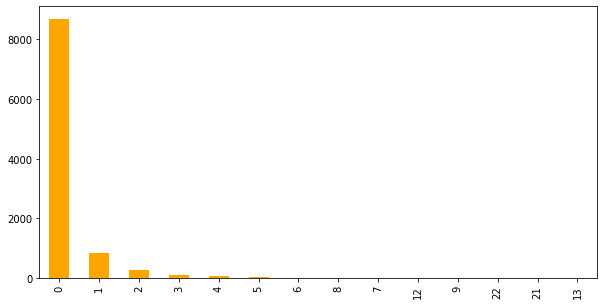

In [ ]:
plt.figure(figsize=(10,5))
df.numerics.value_counts().plot(kind= 'bar', color= 'orange')


By looking at this plot, we see that most of the reviews have 5 or less numerics.

## Distribution of 'upper' values
Upper stands for number of upper case character

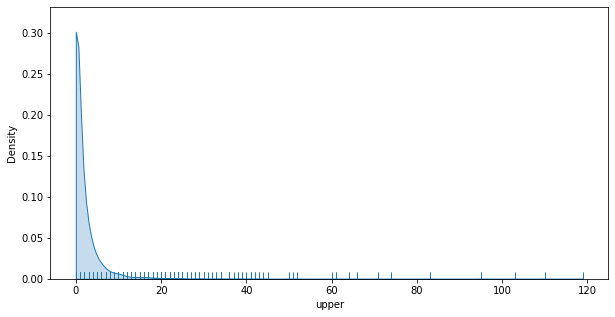

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(df.upper, shade=True, cut=0)
sns.rugplot(df.upper);

### Distribution of word_count values

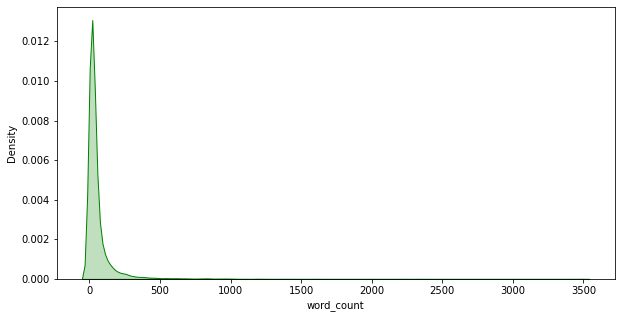

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(df.word_count,shade=True, color = 'green')

### Distribution of char_count values

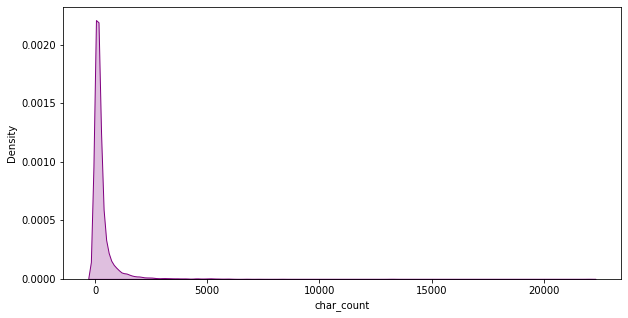

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(df.char_count,shade=True, color = 'purple')

### Distribution of avg_word length

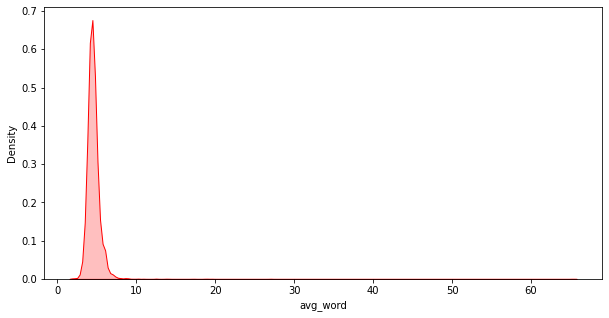

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(df.avg_word,shade=True, color = 'red')

### Number of Characters in Reviews

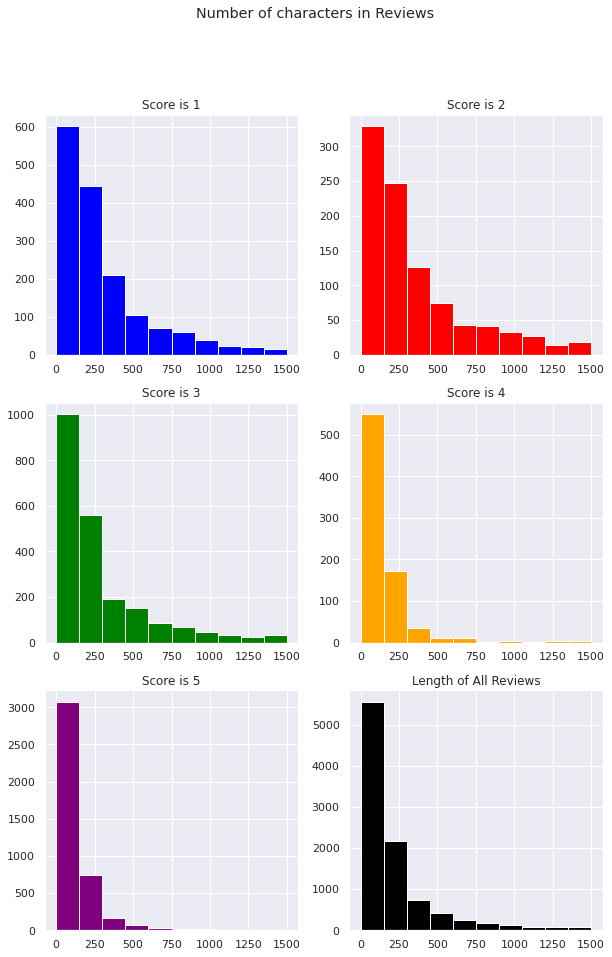

In [ ]:
sns.set(color_codes=True)
fig, axs = plt.subplots(3,2, figsize=(10, 15))

#Score 1
review_len = df.loc[df['star_rating']==1]['review'].str.len()
axs[0,0].hist(review_len, color='blue', range=(0,1500))
axs[0,0].set_title('Score is 1')

#Score 2
review_len = df.loc[df['star_rating']==2]['review'].str.len()
axs[0,1].hist(review_len, color='red',range=(0,1500))
axs[0,1].set_title('Score is 2')

#Score 3
review_len = df.loc[df['star_rating']==3]['review'].str.len()
axs[1,0].hist(review_len, color='green', range=(0,1500))
axs[1,0].set_title('Score is 3')

#Score 4
review_len = df.loc[df['star_rating']==4]['review'].str.len()
axs[1,1].hist(review_len, color='orange', range=(0,1500))
axs[1,1].set_title('Score is 4')


#Score 5
review_len = df.loc[df['star_rating']==5]['review'].str.len()
axs[2,0].hist(review_len, color='purple', range=(0,1500))
axs[2,0].set_title('Score is 5')

#All Scores
review_len = df['review'].str.len()
axs[2,1].hist(review_len, color='black', range=(0,1500))
axs[2,1].set_title('Length of All Reviews')


fig.suptitle('Number of characters in Reviews')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


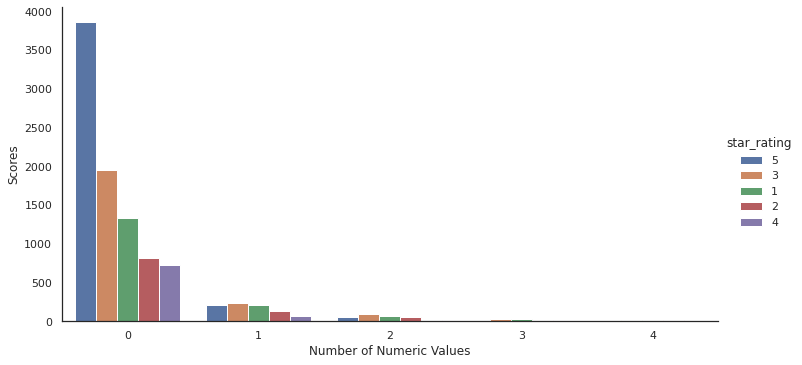

In [ ]:
# Now, let's take a look at the Number of Words number for tweets



with sns.axes_style('white'):
    g = sns.catplot( 'numerics', data= df.loc[df.numerics <= 4], aspect= 2, kind='count', 
                    hue='star_rating', hue_order=df['star_rating'].value_counts().sort_values(ascending=False).index)
    g.set_ylabels('Scores')
    g.set_xlabels('Number of Numeric Values')
    g.set_titles('Distrubition of Number of Numeric values for Reviews')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


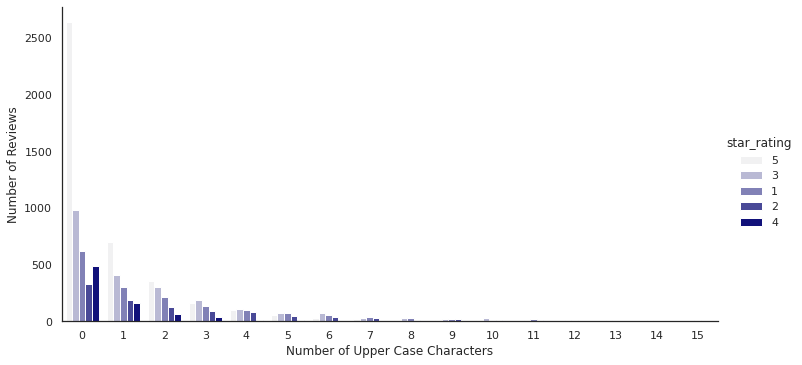

In [ ]:
# Now, let's take a look at the number of upper sase characters for reviews

# I will take max upper= 20


with sns.axes_style('white'):
    g = sns.catplot( 'upper', data= df.loc[df.upper <= 15], aspect= 2, kind='count', 
                    hue='star_rating', hue_order=df['star_rating'].value_counts().sort_values(ascending=False).index, color= 'DarkBlue')
    g.set_ylabels('Number of Reviews')
    g.set_xlabels('Number of Upper Case Characters')
    g.set_titles('Distrubition of Number of Upper Case Characters for Reviews')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


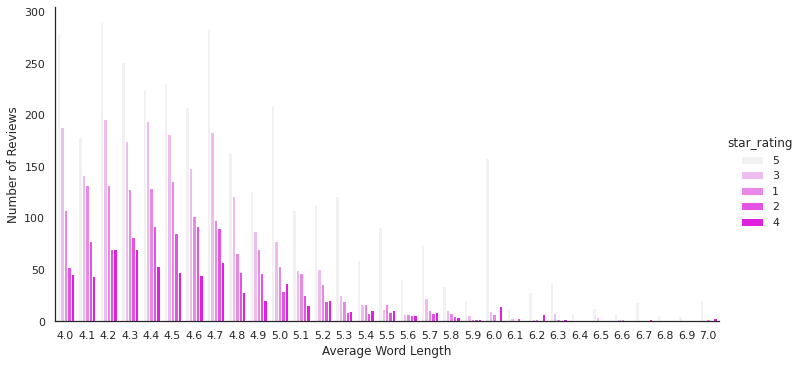

In [ ]:

#Average Word Length

# Now, let's take a look at the number of upper sase characters for reviews

# I will take max upper= 20

#plt.figure(figsize=(12,10), dpi= 100 )
#sns.set(font_scale=1)

with sns.axes_style('white'):
    g = sns.catplot( 'avg_word', data= df.loc[(df.avg_word <= 7) & (df.avg_word >= 4)], aspect= 2, kind='count', 
                    hue='star_rating', hue_order=df['star_rating'].value_counts().sort_values(ascending=False).index, color = 'Magenta')
    g.set_ylabels('Number of Reviews')
    g.set_xlabels('Average Word Length')
    g.set_titles('Distrubition of words for Reviews')

In [ ]:
df["Good_reviews"] = df["star_rating"].apply(lambda x : 1 if x>3 else 0)
df.head(3)

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_date,review,review_category,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word,Good_reviews
0,35311,UK,4652511,R2PF9XCB2AOY7C,B00MNYTWMI,174964168,Midnight Castle – A Free Hidden Object Mystery...,Mobile_Apps,5,0,1,N,Y,2014-09-16,"Addictive game Very good game, the graphics ar...",1,4,3,0,0,1,18,104,4.8,1
1,44590,UK,8778070,R2OVRHVTCC7U18,B00I8Q77Y0,370420344,Flappy Wings (not Flappy Bird),Mobile_Apps,2,1,2,N,Y,2014-02-16,Where to start? I came on here because I wante...,0,19,16,0,0,6,49,271,4.6,0
2,90295,UK,8476187,RRPSNSVU2RNE4,B008PEHK6U,173475712,Man of Steel [DVD],Video DVD,3,1,5,N,N,2013-12-28,Really Disappointed in this Film I have to say...,0,153,65,0,2,13,383,2119,4.5,0


### Creating 'Subjectivity' and 'Polarity' Scores
* Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
* Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

df['review']= df['review'].astype(str)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


df['polarity'] = df['review'].apply(pol)
df['subjectivity'] = df['review'].apply(sub)
df.head(3)

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_date,review,review_category,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word,Good_reviews,polarity,subjectivity
0,35311,UK,4652511,R2PF9XCB2AOY7C,B00MNYTWMI,174964168,Midnight Castle – A Free Hidden Object Mystery...,Mobile_Apps,5,0,1,N,Y,2014-09-16,"Addictive game Very good game, the graphics ar...",1,4,3,0,0,1,18,104,4.8,1,0.155417,0.620417
1,44590,UK,8778070,R2OVRHVTCC7U18,B00I8Q77Y0,370420344,Flappy Wings (not Flappy Bird),Mobile_Apps,2,1,2,N,Y,2014-02-16,Where to start? I came on here because I wante...,0,19,16,0,0,6,49,271,4.6,0,0.200000,0.475000
2,90295,UK,8476187,RRPSNSVU2RNE4,B008PEHK6U,173475712,Man of Steel [DVD],Video DVD,3,1,5,N,N,2013-12-28,Really Disappointed in this Film I have to say...,0,153,65,0,2,13,383,2119,4.5,0,0.067918,0.547267


In [ ]:
df['polarity'] = df['polarity'].round(2)
df['subjectivity'] = df['subjectivity'].round(2)
df.sample(5)

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_date,review,review_category,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word,Good_reviews,polarity,subjectivity
4017,44352,UK,8740428,R2ZM9Y1CUXB1ZD,B00E8KLWB4,488246640,The Secret Society® - Hidden Mystery,Mobile_Apps,1,0,0,N,Y,2014-11-05,"One Star Couldn't even rate this app really , ...",0,4,3,0,0,0,14,74,4.4,0,0.20,0.20
8797,21195,UK,23991630,R1Z17B50EJK4DM,0762445262,605375811,Batman: Bat Signal (Mega Mini Kits),Books,3,3,5,N,Y,2012-09-03,a nice gadget not entirely sure what to expect...,0,16,12,0,0,0,33,171,4.2,0,0.41,0.88
1478,91981,UK,13050137,RVT67HA11TKHX,B005ZCHLOG,827187473,Prometheus [DVD] [2012],Video DVD,3,2,3,N,Y,2014-05-11,"same old story, retold if you think its going ...",0,16,14,0,0,0,33,184,4.6,0,0.24,0.46
7043,51823,UK,3495025,R14OLU1E3DK4QW,B000EU1K8W,725921593,Stadium Arcadium,Music,5,0,0,N,Y,2015-07-10,Five Stars A really good album and a great band.,1,2,1,0,0,1,10,48,3.9,1,0.75,0.68
4841,42346,UK,7119356,R8CRVVN2SASAS,B004FRX0MY,473764126,Amazon Music [Android],Mobile_Apps,1,1,1,N,N,2015-08-15,Spotify is much better. Rubbish. Only using it...,0,17,10,0,0,4,57,297,4.2,0,0.08,0.62


In [ ]:
df2= pd.DataFrame()

In [ ]:
for i in range (1,6):
  df2.loc[i,'polarity']= (df.head(100000).loc[df.star_rating == i].polarity.mean())
  df2.loc[i,'subjectivity']= (df.head(100000).loc[df.star_rating == i].subjectivity.mean())

In [ ]:
df2

,polarity,subjectivity
1,-0.067417,0.499061
2,0.035150,0.528039
3,0.186077,0.518600
4,0.371779,0.575025
5,0.468101,0.618817


In [ ]:
df3= pd.DataFrame()
for i in range (0,2):
  df3.loc[i,'polarity']= (df.head(100000).loc[df.Good_reviews == i].polarity.mean())
  df3.loc[i,'subjectivity']= (df.head(100000).loc[df.Good_reviews == i].subjectivity.mean())
  
df3

,polarity,subjectivity
0,0.071677,0.514104
1,0.452465,0.611708


## Examining polarity
Remember:Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

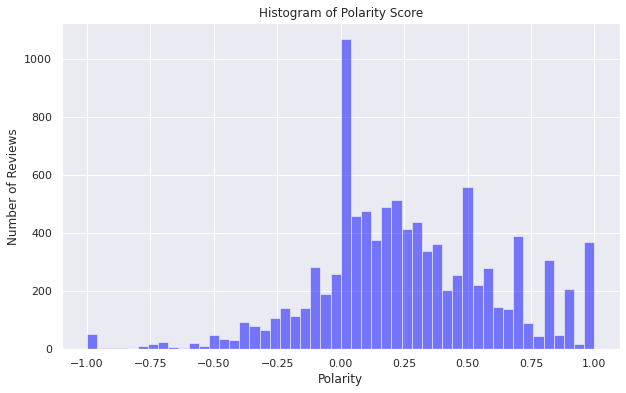

In [ ]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

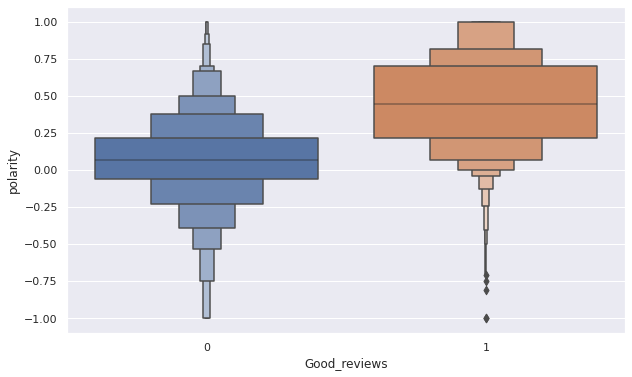

In [ ]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='Good_reviews', y='polarity', data=df)
plt.show();

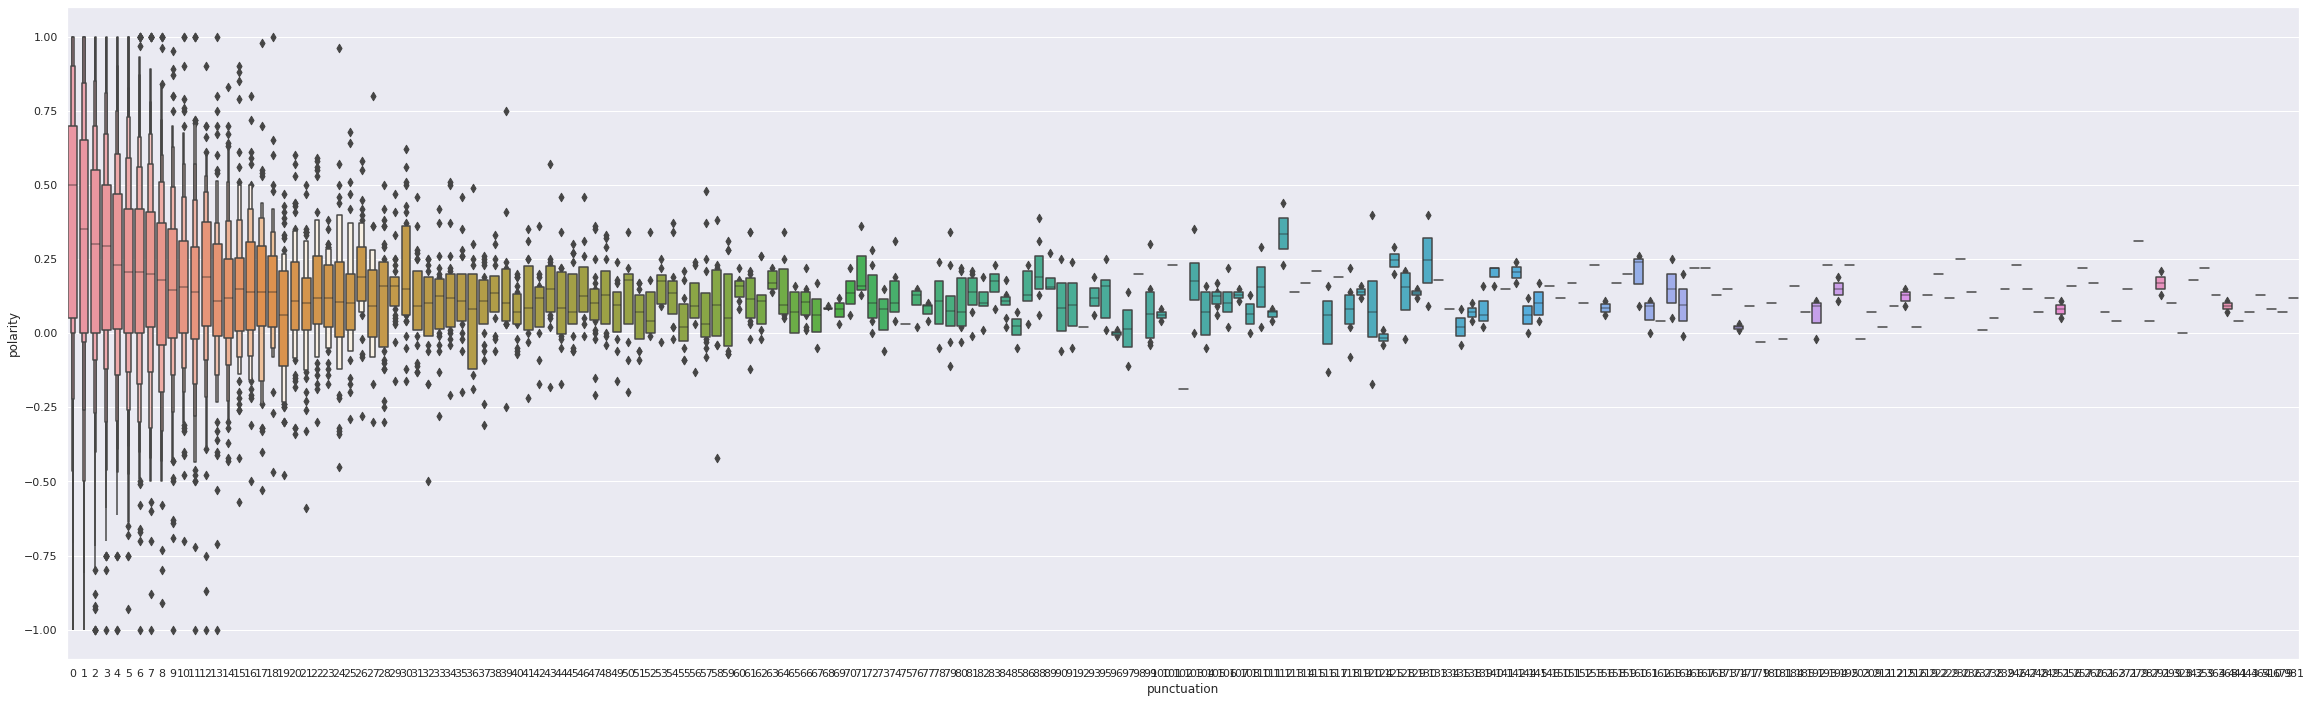

In [ ]:
plt.figure(figsize=(40,12))
sns.boxenplot(x='punctuation', y='polarity', data=df)
plt.show();

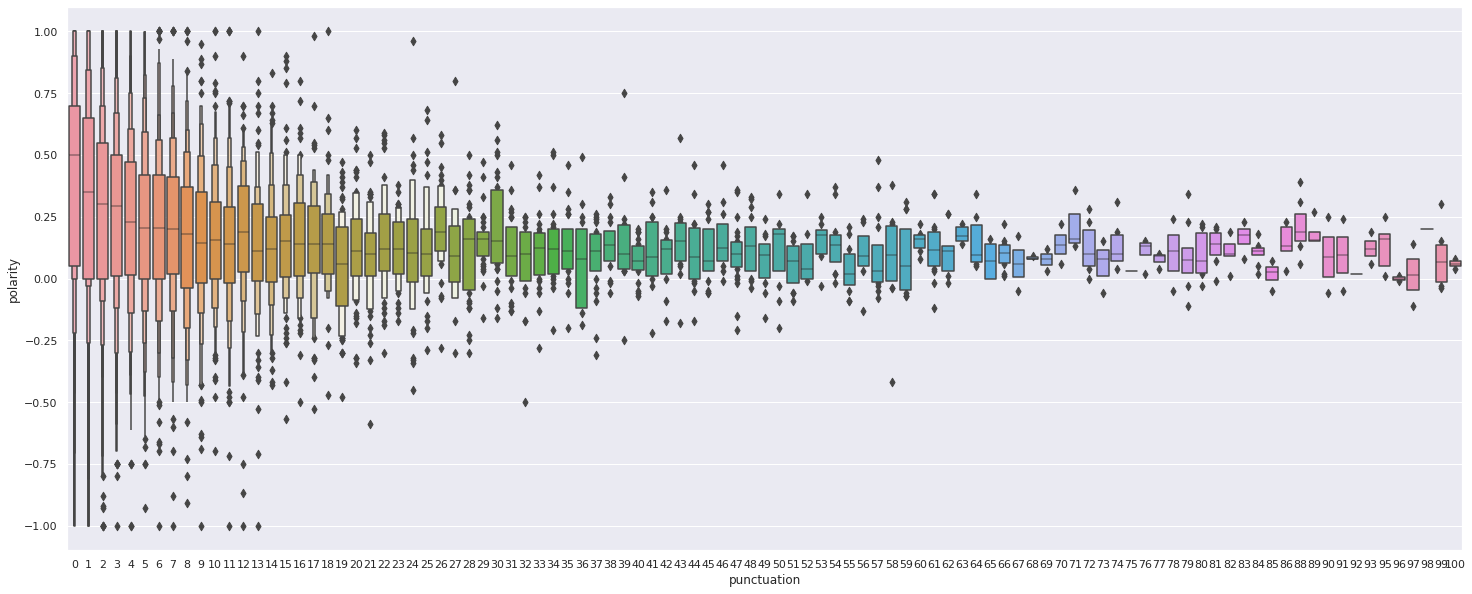

In [ ]:
plt.figure(figsize=(25,10))
df2= df.loc[df.punctuation <= 100]
sns.boxenplot(x='punctuation', y='polarity', data=df2)
plt.show();

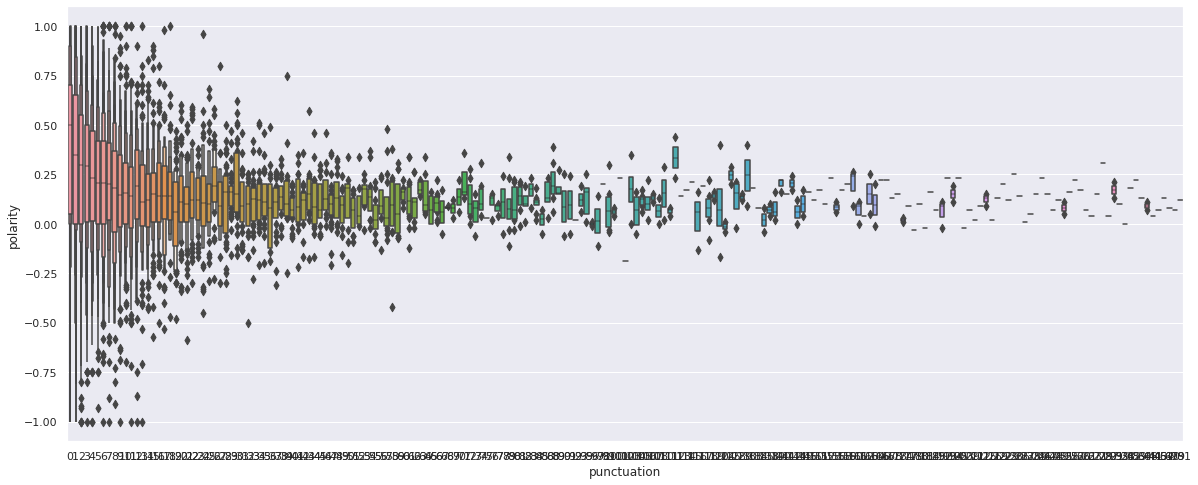

In [ ]:
plt.figure(figsize=(20,8))
sns.boxenplot(x='punctuation', y='polarity', data=df)
plt.show();

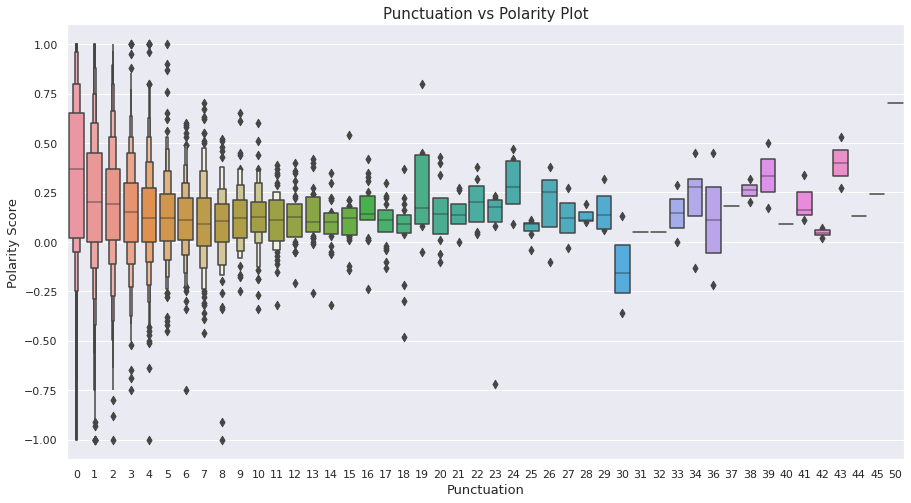

In [ ]:
# sns.set(font_scale=1) #default setting

plt.figure(figsize=(15,8))
df3= df.loc[df.upper <= 50]
sns.boxenplot(x='upper', y='polarity', data=df3)
plt.xlabel('Punctuation', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Punctuation vs Polarity Plot', fontsize=15)
plt.show();

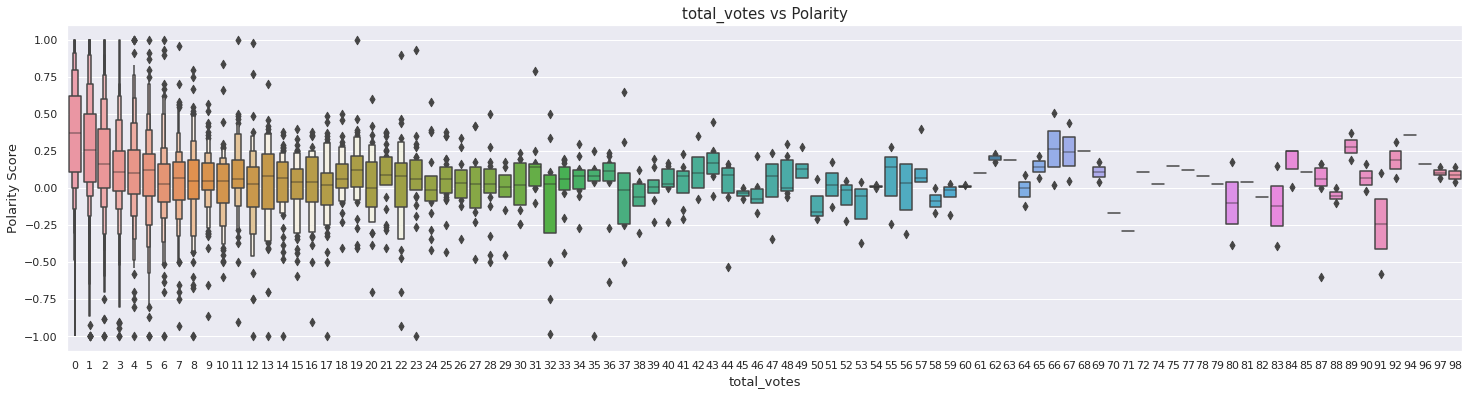

In [ ]:
plt.figure(figsize=(25,6))
df_sub= df.loc[df.total_votes <=100]
sns.boxenplot(x='total_votes', y='polarity', data=df_sub)
plt.xlabel('total_votes', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('total_votes vs Polarity', fontsize=15)
plt.show();

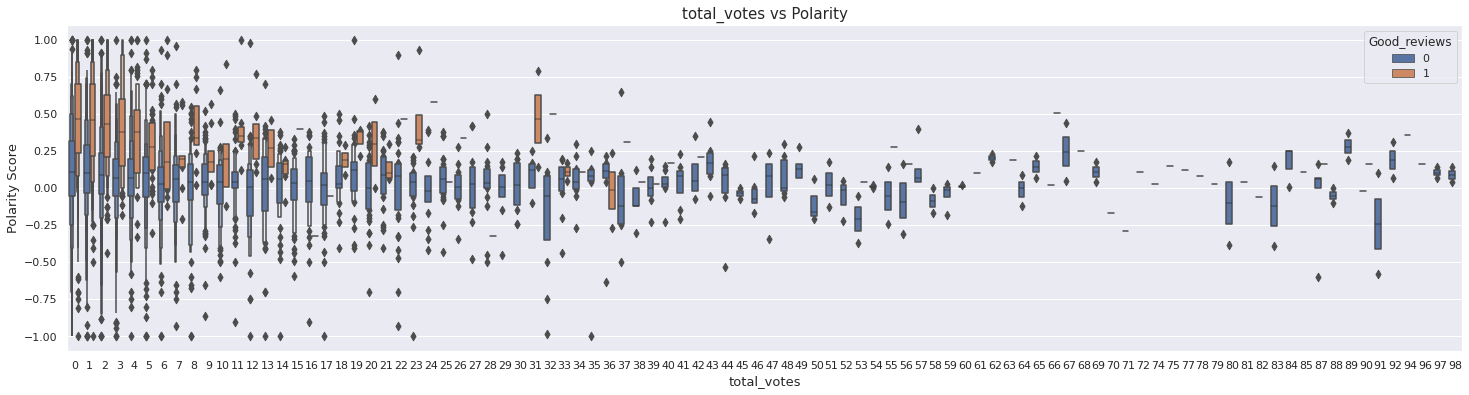

In [ ]:
plt.figure(figsize=(25,6))
df_sub= df.loc[df.total_votes <=100]
sns.boxenplot(x='total_votes', y='polarity', data=df_sub, hue='Good_reviews')
plt.xlabel('total_votes', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('total_votes vs Polarity', fontsize=15)
plt.show();

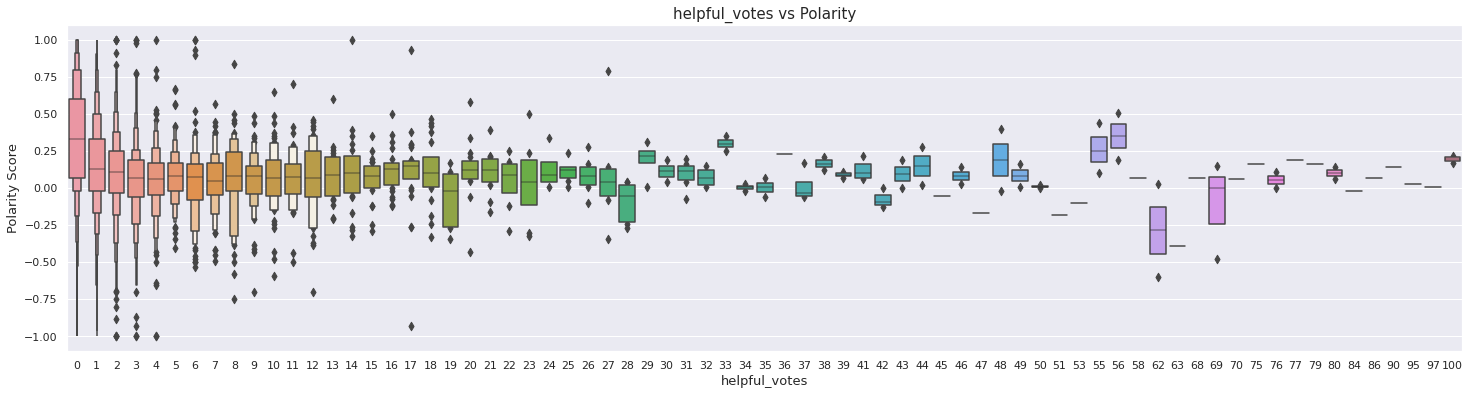

In [ ]:
plt.figure(figsize=(25,6))
df_sub= df.loc[df.helpful_votes <=100]
sns.boxenplot(x='helpful_votes', y='polarity', data=df_sub)
plt.xlabel('helpful_votes', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('helpful_votes vs Polarity', fontsize=15)
plt.show();

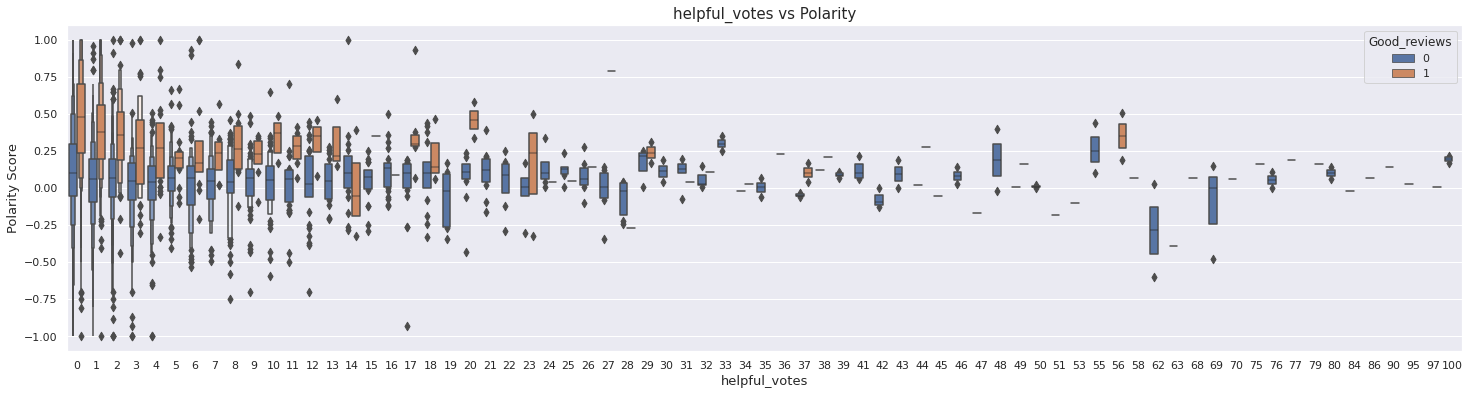

In [ ]:
plt.figure(figsize=(25,6))
df_sub= df.loc[df.helpful_votes <=100]
sns.boxenplot(x='helpful_votes', y='polarity', data=df_sub, hue='Good_reviews')
plt.xlabel('helpful_votes', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('helpful_votes vs Polarity', fontsize=15)
plt.show();

## Polarity vs Number of Words

In [ ]:
df2= df
df2['word_count']= df2['word_count'] //50*50

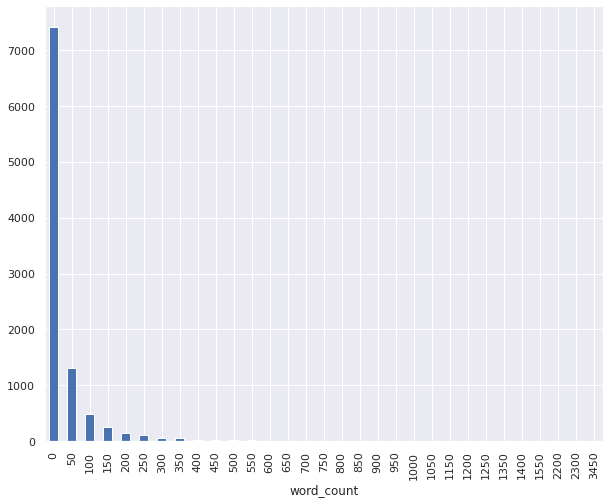

In [ ]:
df.polarity.groupby(df.word_count // 50 * 50).count().plot(kind ='bar')

In [ ]:
df_sub= df.loc[df.word_count //10*10]

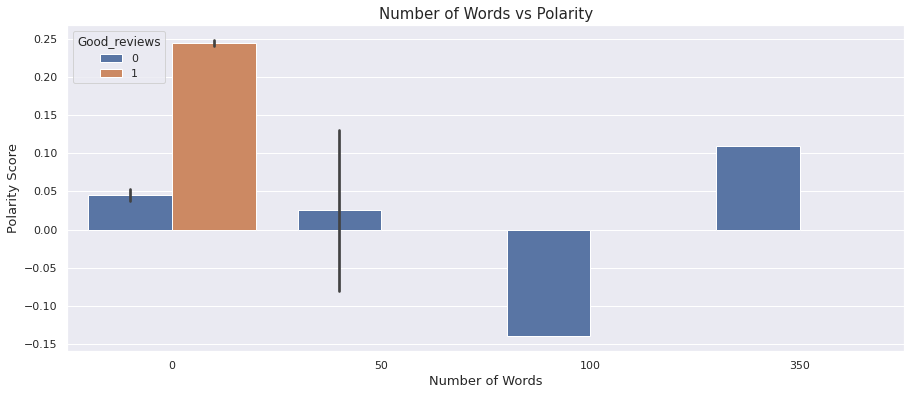

In [ ]:

plt.figure(figsize=(15,6))
sns.barplot(x='word_count', y='polarity', hue='Good_reviews', data=df_sub)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Number of Words vs Polarity', fontsize=15)
plt.show();

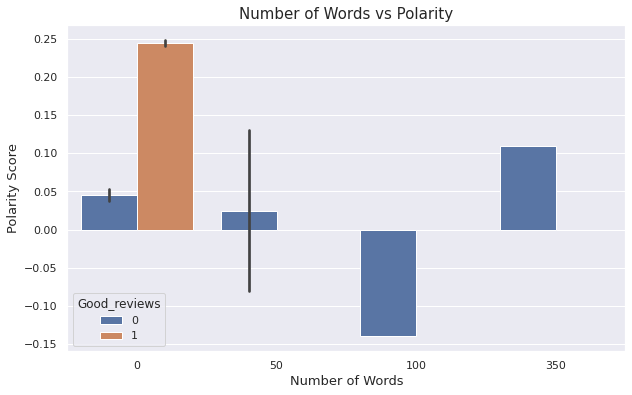

In [ ]:
df_sub2= df.loc[df.word_count //50 * 50]
plt.figure(figsize=(10,6))
sns.barplot(x='word_count', y='polarity', hue='Good_reviews', data=df_sub2)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Number of Words vs Polarity', fontsize=15)
plt.show();

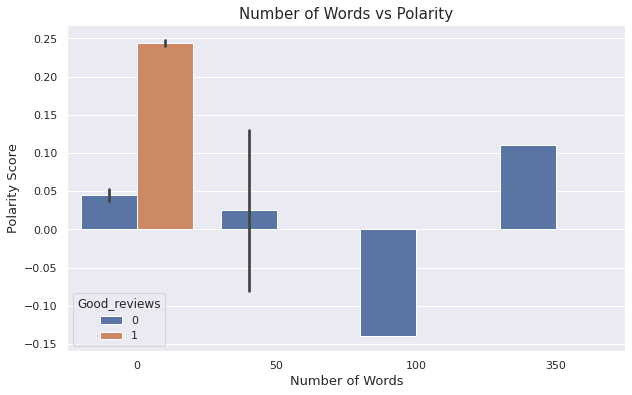

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='word_count', y='polarity', hue='Good_reviews', data=df.loc[df.word_count //10 * 10])
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Number of Words vs Polarity', fontsize=15)
plt.show();

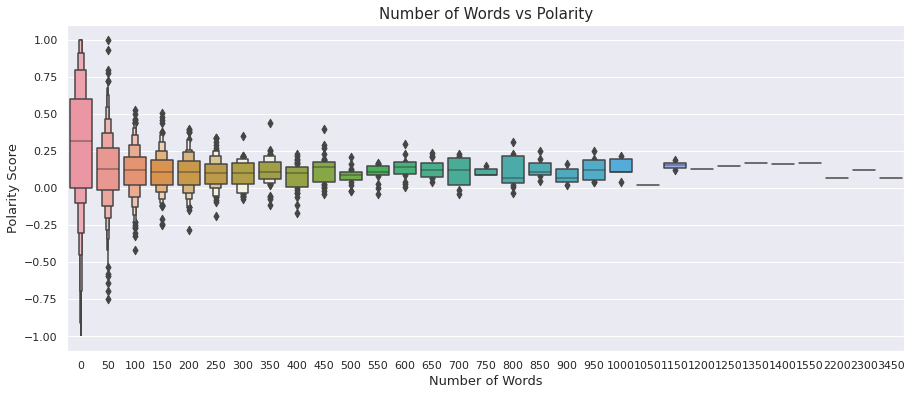

In [ ]:
plt.figure(figsize=(15,6))
sns.boxenplot(x='word_count', y='polarity', data=df)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Number of Words vs Polarity', fontsize=15)
plt.show();

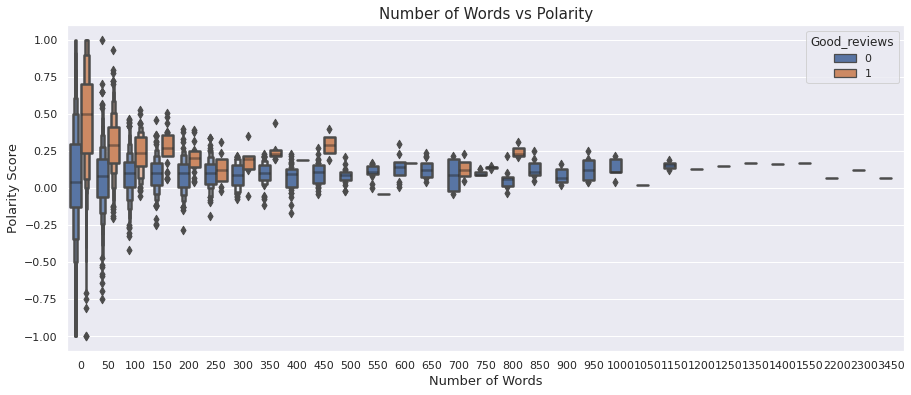

In [ ]:
plt.figure(figsize=(15,6))
#df_sub2= df_sub.loc[df.word_count //50 * 50]

sns.boxenplot(x='word_count', y='polarity', hue='Good_reviews',  linewidth=2.5, data=df)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Number of Words vs Polarity', fontsize=15)
plt.show();

##  Examining Subjectivity
The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

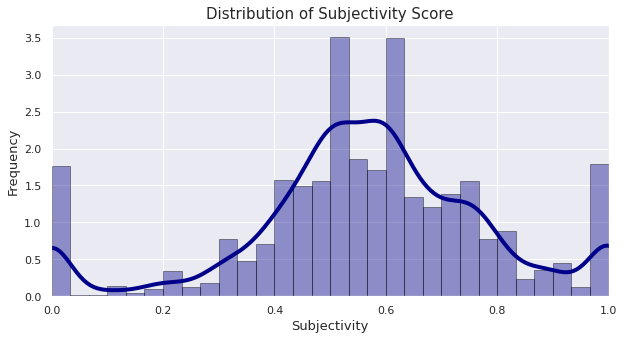

In [ ]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)

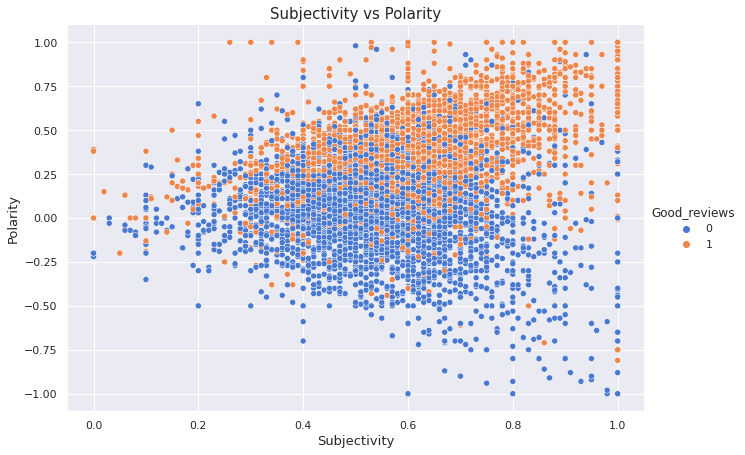

In [ ]:
#plt.figure(figsize=(10,6))
sns.relplot(x="subjectivity", y="polarity", hue="Good_reviews", alpha=1 , palette="muted",
            height=6, aspect= 1.5, data=df)
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Polarity', fontsize=13)
plt.title('Subjectivity vs Polarity', fontsize=15)
plt.show();

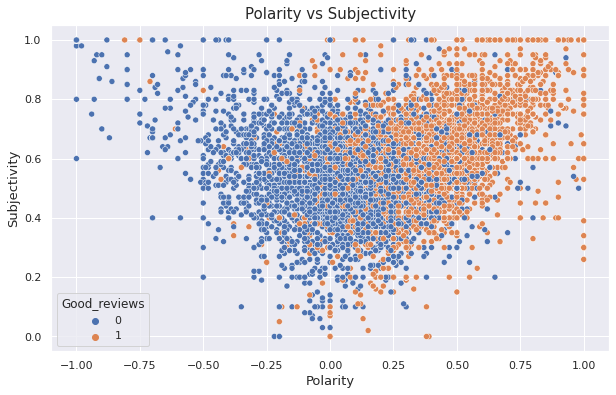

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='polarity', y='subjectivity', hue="Good_reviews", data=df)
plt.xlabel('Polarity', fontsize=13)
plt.ylabel('Subjectivity', fontsize=13)
plt.title('Polarity vs Subjectivity', fontsize=15)
plt.show();

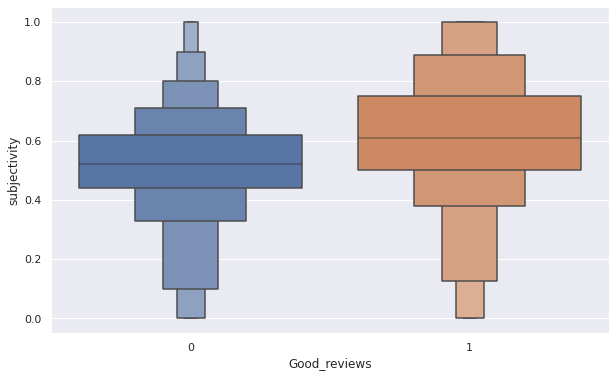

In [ ]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='Good_reviews', y='subjectivity', data=df)
plt.show();

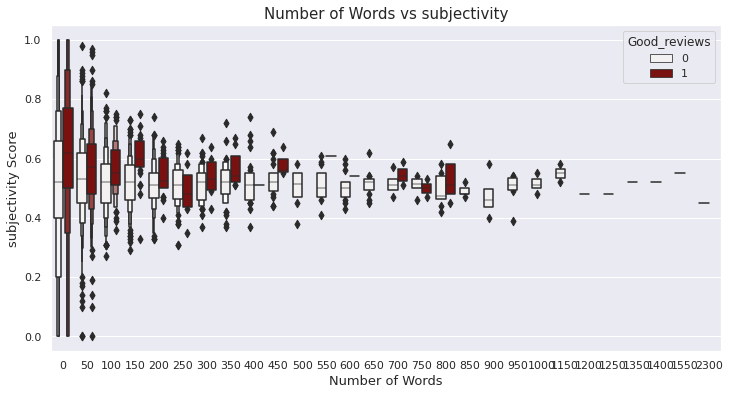

In [ ]:
plt.figure(figsize=(12,6))
df_sub= df.loc[df.helpful_votes <=30]
sns.boxenplot(x='word_count', y='subjectivity', hue='Good_reviews', data=df_sub, color= 'darkred')
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('subjectivity Score', fontsize=13)
plt.title('Number of Words vs subjectivity', fontsize=15)
plt.show();

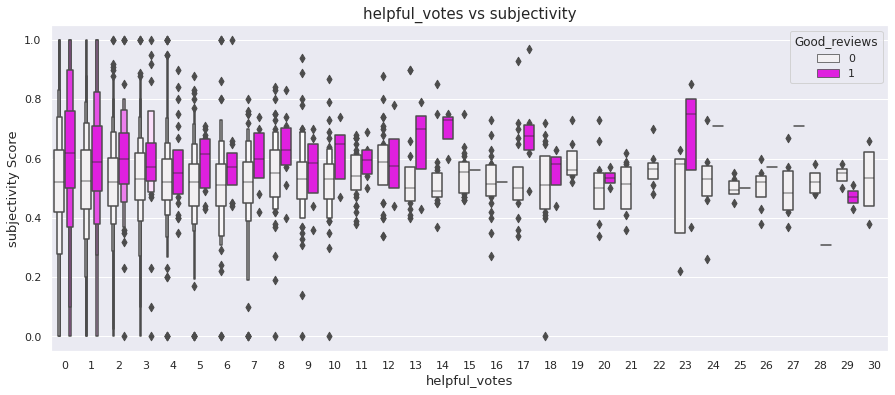

In [ ]:
plt.figure(figsize=(15,6))
df_sub= df.loc[df.helpful_votes <=30]
sns.boxenplot(x='helpful_votes', y='subjectivity', hue='Good_reviews', data=df_sub, color= 'magenta')
plt.xlabel('helpful_votes', fontsize=13)
plt.ylabel('subjectivity Score', fontsize=13)
plt.title('helpful_votes vs subjectivity', fontsize=15)
plt.show();